<a href="https://colab.research.google.com/github/munieshwarevakattu/CMPE257-FALL23-MUNIESHWAR-EVAKATTU/blob/homework-2/ML_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
#### CREDITS: Wencen Wu ####
import numpy as np

#parameters
rad = 10
thk = 5
sep = 5

#n data points,(x1,y1) are the coordinates of the top semi-circle
def generatedata(rad,thk,sep,n,x1 = 0,y1 = 0):
    # center of the top semi-circle
    X1 = x1
    Y1 = y1

    # center of the bottom semi-circle
    X2 = X1 + rad + thk / 2
    Y2 = Y1 - sep

    # data points in the top semi-circle
    top = []
    # data points in the bottom semi-circle
    bottom = []

    # parameters
    r1 = rad + thk
    r2 = rad

    cnt = 1
    while(cnt <= n):
        #uniformed generated points
        x = np.random.uniform(-r1,r1)
        y = np.random.uniform(-r1,r1)

        d = x**2 + y**2
        if(d >= r2**2 and d <= r1**2):
            if (y > 0):
                top.append([X1 + x,Y1 + y])
                cnt += 1
            else:
                bottom.append([X2 + x,Y2 + y])
                cnt += 1
        else:
            continue

    return top,bottom

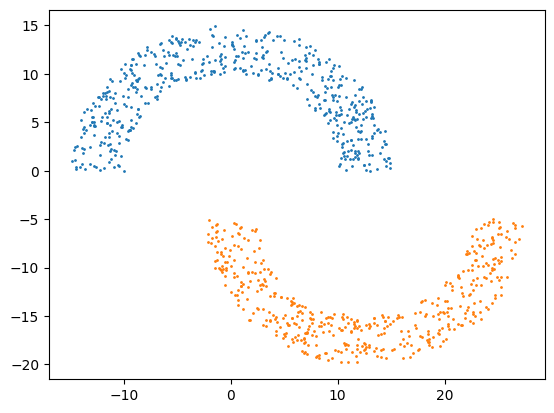

In [46]:
import matplotlib.pyplot as plt
top,bottom = generatedata(rad,thk,sep,1000)
X1 = [i[0] for i in top]
Y1 = [i[1] for i in top]

X2 = [i[0] for i in bottom]
Y2 = [i[1] for i in bottom]

plt.scatter(X1,Y1,s = 1)
plt.scatter(X2,Y2,s = 1)
#plt.show()

In [47]:
import pandas as pd
data_source1=pd.DataFrame(top, columns=["X1","X2"])

data_source1["Y"]=1
#print(data_source1.head())

data_source2=pd.DataFrame(bottom,columns=["X1","X2"])
data_source2["Y"]=-1
#print(data_source2.head())
data_source=pd.concat([data_source1,data_source2],ignore_index=True)


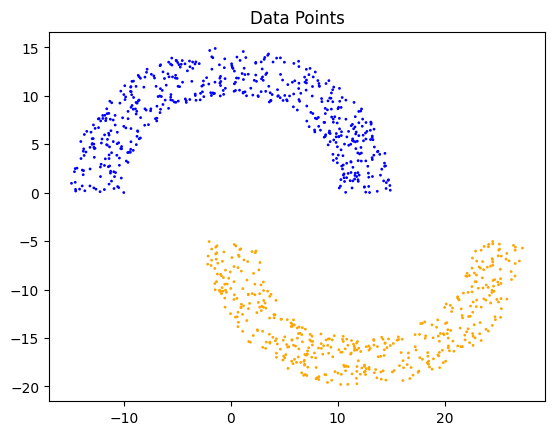

In [48]:
import matplotlib.pyplot as plt

# Define the colors based on the target variable values
colors = ['blue' if i == 1 else 'orange' for i in data_source.Y]

# Create a scatter plot with the specified colors
plt.scatter(data_source.X1, data_source.X2, s=1, c=colors)
plt.title("Data Points")

plt.show()


## LP 1 Q A

In [49]:
data_source['X0'] = 1
X = data_source[['X0', 'X1', 'X2']].values
Y = data_source['Y'].values
times, features = X.shape

def plaalgo(X, Y, num_iter=1000):

    weights = np.zeros(X.shape[1])
    for i in range(num_iter):
        misclass = 0
        for j in range(len(X)):
            if Y[j] * np.dot(X[j], weights) <= 0:
                weights += Y[j] * X[j]
                misclass += 1
        if misclass == 0:
            break

        print(f"iteration:{i+1} , weights{weights}, Number of misclass: {misclass}")

    return weights, misclass

weights,misclass = plaalgo(X, Y)

def compute(weights, X, Y):
    predict = np.sign(np.dot(X, weights))
    accuracy = np.mean(predict == Y)
    return accuracy
accuracy=compute(weights,X,Y)


print(f"Best Weights: {weights}, Number of misclass: {misclass}")
print(f"Accuracy: {accuracy*100} %")

iteration:1 , weights[12.          0.50866036 34.28505242], Number of misclass: 12
Best Weights: [12.          0.50866036 34.28505242], Number of misclass: 0
Accuracy: 100.0 %


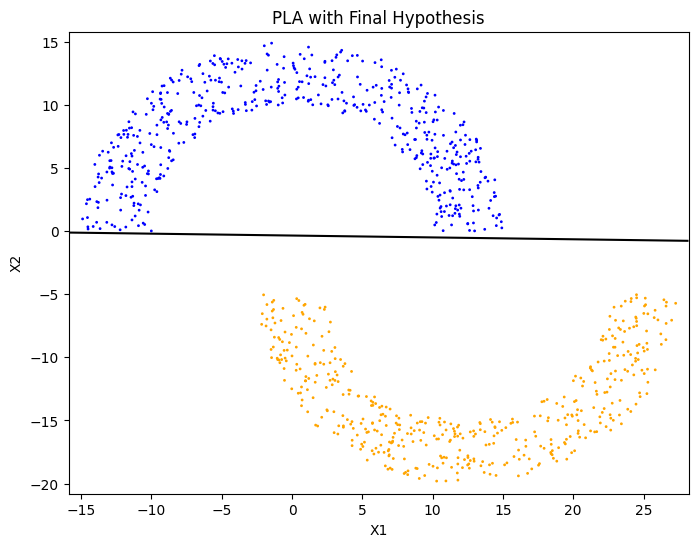

In [50]:
def plot(weights):
  X1 = data_source.X1
  X2 = data_source.X2
  labels = data_source.Y
  plt.figure(figsize=(8, 6))
  colors = ['blue' if i == 1 else 'orange' for i in data_source.Y]
  plt.scatter(data_source.X1, data_source.X2, s=1, c=colors)
  x1_min, x1_max = X1.min() - 1, X1.max() + 1
  x2_min, x2_max = X2.min() - 1, X2.max() + 1
  x, y = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
  Z = np.dot(np.c_[np.ones_like(x.ravel()), x.ravel(), y.ravel()], weights)
  Z = Z.reshape(x.shape)
  plt.contour(x, y, Z, levels=[0], colors="black", linestyles='-')
  plt.xlabel('X1')
  plt.ylabel('X2')
  plt.title("PLA with Final Hypothesis")
  plt.show()
plot(weights)

## LP1 Q-B
Linear Regression

In [51]:
X_T=np.transpose(X)
X_T_X=np.matmul(X_T,X)
X_inv=np.linalg.inv(X_T_X)
weights1=np.matmul(X_inv, X_T)
weights1=np.matmul(weights1,Y)
print(f"Weights from Linear Regression:{weights1}")

Weights from Linear Regression:[ 0.27832527 -0.00750856  0.07986775]


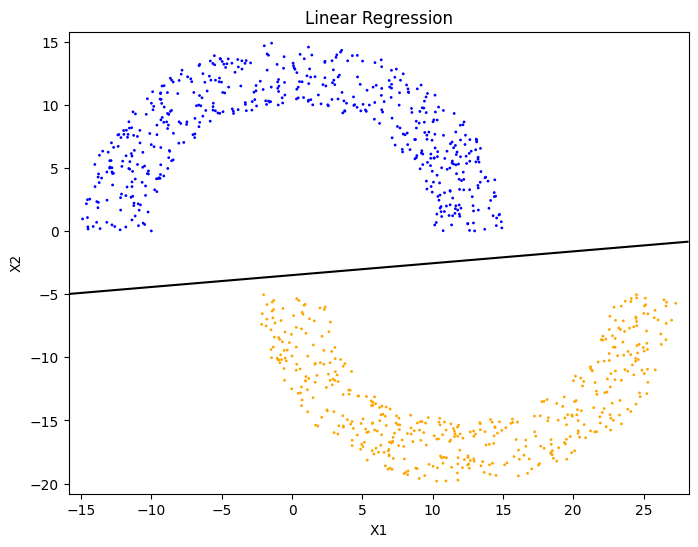

In [52]:
final_weights = weights1
X1 = data_source.X1
X2 = data_source.X2
labels = data_source.Y
plt.figure(figsize=(8, 6))
plt.scatter(data_source.X1, data_source.X2, s=1, c=colors)
x1_min, x1_max = X1.min() - 1, X1.max() + 1
x2_min, x2_max = X2.min() - 1, X2.max() + 1
x, y = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
Z = np.dot(np.c_[np.ones_like(x.ravel()), x.ravel(), y.ravel()], weights1)
Z = Z.reshape(x.shape)
plt.contour(x, y, Z, levels=[0], colors="black", linestyles='-')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title("Linear Regression")
plt.show()

As per the observations on pla ans linearregression the data, both the algorithms provide 100% accuracy classifying the target. But Linear regression provide better seperability of data and itseems the out of sample error would be less in linear regression when compared to pocket.

## LP 2

In [53]:
#### CREDITS: Wencen Wu ####
import numpy as np

#parameters
rad = 10
thk = 5
sep = -5

#n data points,(x1,y1) are the coordinates of the top semi-circle
def generatedata(rad,thk,sep,n,x1 = 0,y1 = 0):
    # center of the top semi-circle
    X1 = x1
    Y1 = y1

    # center of the bottom semi-circle
    X2 = X1 + rad + thk / 2
    Y2 = Y1 - sep

    # data points in the top semi-circle
    top1 = []
    # data points in the bottom semi-circle
    bottom1 = []

    # parameters
    r1 = rad + thk
    r2 = rad

    cnt = 1
    while(cnt <= n):
        #uniformed generated points
        x = np.random.uniform(-r1,r1)
        y = np.random.uniform(-r1,r1)

        d = x**2 + y**2
        if(d >= r2**2 and d <= r1**2):
            if (y > 0):
                top1.append([X1 + x,Y1 + y])
                cnt += 1
            else:
                bottom1.append([X2 + x,Y2 + y])
                cnt += 1
        else:
            continue

    return top1,bottom1

Text(0.5, 1.0, 'New Data')

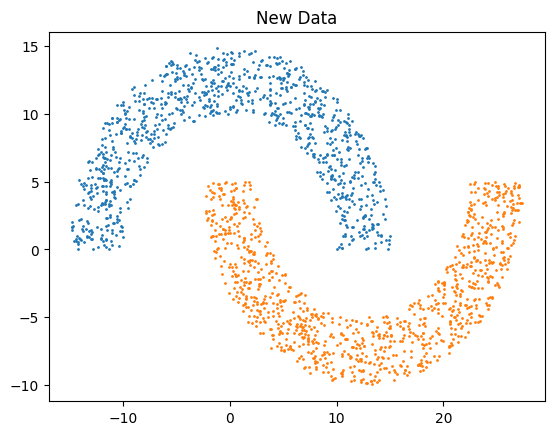

In [54]:
top1,bottom1 = generatedata(rad,thk,sep,2000)
X1 = [i[0] for i in top1]
Y1 = [i[1] for i in top1]

X2 = [i[0] for i in bottom1]
Y2 = [i[1] for i in bottom1]

plt.scatter(X1,Y1,s = 1)
plt.scatter(X2,Y2,s = 1)
plt.title("New Data")
#plt.show()

## LP 2 Q-A

In [55]:
data_source100=pd.DataFrame(top1, columns=["X1","X2"])

data_source100["Y"]=1
#print(data_source1.head())

data_source200=pd.DataFrame(bottom1,columns=["X1","X2"])
data_source200["Y"]=-1
#print(data_source2.head())
new_data_source=pd.concat([data_source100,data_source200],ignore_index=True)
new_data_source['X0'] = 1
X_n = new_data_source[['X0', 'X1', 'X2']].values
Y_n = new_data_source['Y'].values
times, features = X_n.shape
weights_n,misclass_n = plaalgo(X_n, Y_n,1000)
def compute(weights_n, X_n, Y_n):
    predict = np.sign(np.dot(X_n, weights_n))
    accuracy = np.mean(predict == Y_n)
    return accuracy
accuracy=compute(weights_n,X_n,Y_n)


print(f"Best Weights: {weights_n}, Number of misclass: {misclass_n}")
print(f"Accuracy: {accuracy*100} %")

iteration:1 , weights[-11.          -5.29039881  -1.8500035 ], Number of misclass: 37
iteration:2 , weights[-17.          -6.97019938  -3.81730805], Number of misclass: 52
iteration:3 , weights[-18.         -10.04793146  -2.36422863], Number of misclass: 57
iteration:4 , weights[-17.          -9.52370142  -3.24660779], Number of misclass: 55
iteration:5 , weights[-17.          -9.87999814  -2.84593374], Number of misclass: 56
iteration:6 , weights[-17.          -9.69538119  -2.47927616], Number of misclass: 56
iteration:7 , weights[-19.          -9.99370315  -4.90370592], Number of misclass: 50
iteration:8 , weights[-19.         -10.77721474  -5.4340921 ], Number of misclass: 44
iteration:9 , weights[-14.          -6.81230515  -1.4128708 ], Number of misclass: 37
iteration:10 , weights[-12.          -5.72885265  -3.32896887], Number of misclass: 34
iteration:11 , weights[-10.          -5.19239762  -2.56672988], Number of misclass: 52
iteration:12 , weights[-17.          -9.15272416  -2

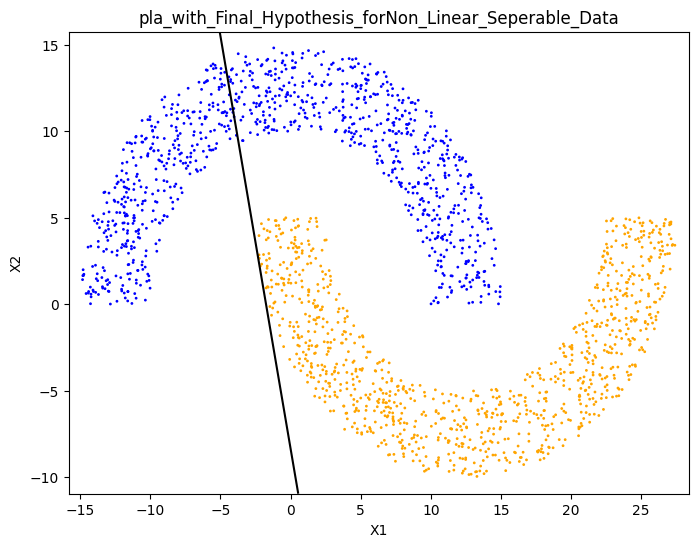

In [56]:
def plots(weights,title):
  X1 = new_data_source.X1
  X2 = new_data_source.X2
  labels = new_data_source.Y
  plt.figure(figsize=(8, 6))
  colors = ['blue' if i == 1 else 'orange' for i in new_data_source.Y]
  plt.scatter(new_data_source.X1, new_data_source.X2, s=1, c=colors)
  x1_min, x1_max = X1.min() - 1, X1.max() + 1
  x2_min, x2_max = X2.min() - 1, X2.max() + 1
  x, y = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
  Z = np.dot(np.c_[np.ones_like(x.ravel()), x.ravel(), y.ravel()], weights)
  Z = Z.reshape(x.shape)
  plt.contour(x, y, Z, levels=[0], colors="black", linestyles='-')
  plt.xlabel('X1')
  plt.ylabel('X2')
  plt.title(title)
  plt.show()

plots(weights_n,"pla_with_Final_Hypothesis_forNon_Linear_Seperable_Data")

The Pla for non linearly seperable data will run in an infinite loop as it keeps changing the weights until it finds the no misclassified points, this is the case here. So I have just modified the maximum iterations as 1000 to simplify it and give the best weight out of it.


## LP 2 Q- B

Final weights: [-55.           5.91579851  34.09249631]


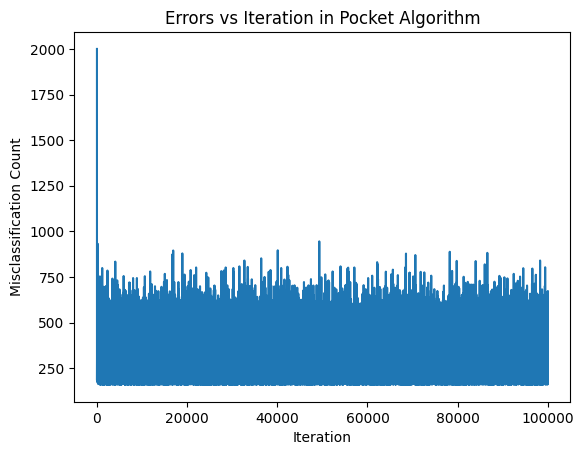

CPU times: user 4.84 s, sys: 112 ms, total: 4.96 s
Wall time: 4.87 s


In [57]:
%%time
def pocket_algorithm(X, Y, max_iterations):
    rows, variables = X.shape
    candidate_weights = np.zeros(variables)
    pocket_weights = np.zeros(variables)
    misclassified_ex = rows
    misclass_ex = []
    for iteration in range(max_iterations):
        predictions = np.sign(np.dot(X, candidate_weights))
        misclassified = np.where(predictions != Y)[0]
        if misclassified.size == 0:
            break
        random_misclassified = np.random.choice(misclassified)
        candidate_weights += Y[random_misclassified] * X[random_misclassified]
        misclass_size = misclassified.size
        misclass_ex.append(misclass_size)
        if misclass_size < misclassified_ex:
            misclassified_ex = misclass_size
            pocket_weights = candidate_weights.copy()
    return pocket_weights, misclass_ex

# Train the Pocket Algorithm and collect errors at each iteration
max_iterations = 100000
final_weights, error_counts = pocket_algorithm(X_n, Y_n, max_iterations)
print("Final weights:", final_weights)

# Plot errors vs. iteration
y=[i for i in error_counts]
x=[i for i in range(1,100001)]

plt.plot(range(len(error_counts)), error_counts, linestyle='-')
#plt.plot(x,y)
#plt.ylim(500,2000)
plt.xlabel("Iteration")
plt.ylabel("Misclassification Count")
plt.title("Errors vs Iteration in Pocket Algorithm")
plt.show()


## LP 2 Q-C

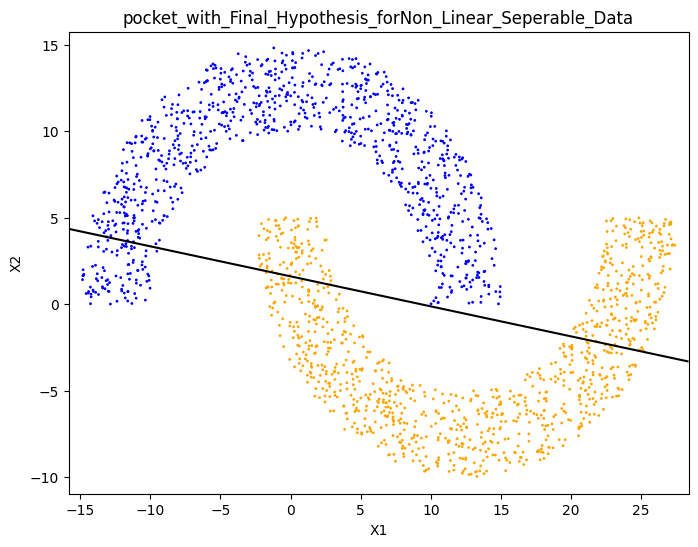

In [58]:
plots(final_weights,"pocket_with_Final_Hypothesis_forNon_Linear_Seperable_Data")

In [59]:
%%time
X_T_n=np.transpose(X_n)
X_T_X_n=np.matmul(X_T_n,X_n)
X_inv_n=np.linalg.inv(X_T_X_n)
weights1_n=np.matmul(X_inv_n, X_T_n)
weights1_n=np.matmul(weights1_n,Y_n)
print(f"Weights from Linear Regression for new data:{weights1_n}")


Weights from Linear Regression for new data:[-0.11219412 -0.02451568  0.1009899 ]
CPU times: user 1.52 ms, sys: 1 ms, total: 2.52 ms
Wall time: 1.36 ms


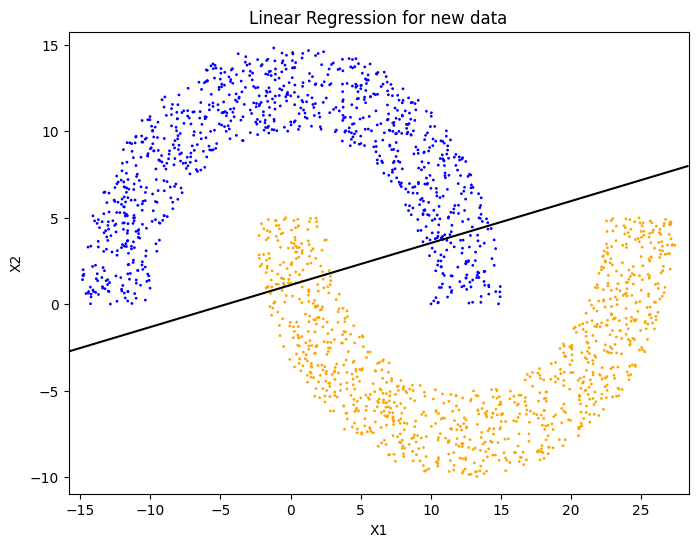

In [60]:
plots(weights1_n, "Linear Regression for new data")

Linear Regression is quite better in terms of time consumption where its taking 2.08ms and pocket is taking 4.6s. If we consider the quality of solution both the algorithms doesnt provide the optimal solution as the data is not linearly seperable, but linear regeression can have better edge as we have taken random choice of misclassified to update the weight, to reduce the computation time in pocket.

## Task 3 LP 1

In [61]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from google.colab import drive
drive.mount('/content/drive')
#Digits_train=pd.read_csv('/content/ZipDigits (2).train',header=None,delim_whitespace=True)
Digits_train=pd.read_csv('/content/drive/MyDrive/data/ZipDigits.train',header=None,delim_whitespace=True)
Digits_test=pd.read_csv('/content/drive/MyDrive/data/ZipDigits.test',header=None,delim_whitespace=True)
#Digits_test=pd.read_csv('ZipDigits.test',header=None,delim_whitespace=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
#Data preprocessing
Digits_train=Digits_train[(Digits_train[0]==1) |(Digits_train[0]==5)]
Digits_train=Digits_train.reset_index(drop=True)
Digits_train[0]=Digits_train[0].apply(lambda x:1 if x==1 else-1)
Digits_test=Digits_test[(Digits_test[0]==1) |(Digits_test[0]==5)]
Digits_test=Digits_test.reset_index(drop=True)
Digits_test[0]=Digits_test[0].apply(lambda x:1 if x==1 else-1)

In [63]:
def intensity(image):
  intensity= np.sum(image[1:])
  return intensity
def symmetry(image):
  image=np.array(image).reshape(1,257)
  left=image[:,1:129]
  right=image[:,129:]
  symmetry=np.sum(np.abs(left-np.flip(right)))
  return symmetry
Digits_train['symmetry']=Digits_train.apply(symmetry,axis=1)
Digits_test['symmetry']=Digits_test.apply(symmetry,axis=1)
Digits_train['intensity']=Digits_train.apply(intensity,axis=1)
Digits_test['intensity']=Digits_test.apply(intensity,axis=1)
symmetry_arr=np.array(Digits_train['symmetry'])
intensity=np.array(Digits_train['intensity'])


In [64]:
symmetry_arr_t=np.array(Digits_test['symmetry'])
intensity_t=np.array(Digits_test['intensity'])
lenght = len(symmetry_arr_t)
intercept = np.ones((lenght, 1), dtype=symmetry_arr_t.dtype)
x1_test=np.vstack((intensity_t, symmetry_arr_t.T))
x_test=np.concatenate((intercept, x1_test.T), axis=1)
y_test=np.array(Digits_test[0])

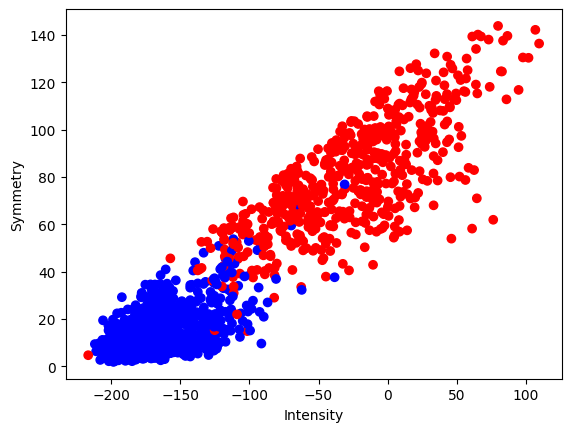

In [77]:
lenght = len(symmetry_arr)
Intercept = np.ones((lenght, 1), dtype=symmetry_arr.dtype)
x1=np.vstack((intensity, symmetry_arr))
x=np.concatenate((Intercept, x1.T), axis=1)
y=np.array(Digits_train[0])
clr=Digits_train[0].map({1:"blue",-1:"red"})
plt.scatter(Digits_train['intensity'],Digits_train['symmetry'],c=clr,label=['1','-1'])
plt.xlabel('Intensity')
plt.ylabel('Symmetry')
plt.show()
def calcFunc(w,x):
  return np.sign(np.dot(w,np.transpose(x)))

In [78]:
def misclass(w,x,y):
  predictions = calcFunc(w, x)
  return np.sum(predictions != y)
def plotq(w,clr,algo):
  m=-w[1] / w[2]
  c = -w[0] / w[2]
  axes=plt.gca()
  xx = np.array(axes.get_xlim())
  yy = m*xx+c
  plt.title("Final Hypothesis "+algo)
  plt.plot(xx, yy, color=clr)

The final weights are  [  11.    -207.562 -485.542]
Total number of misclassified: 15


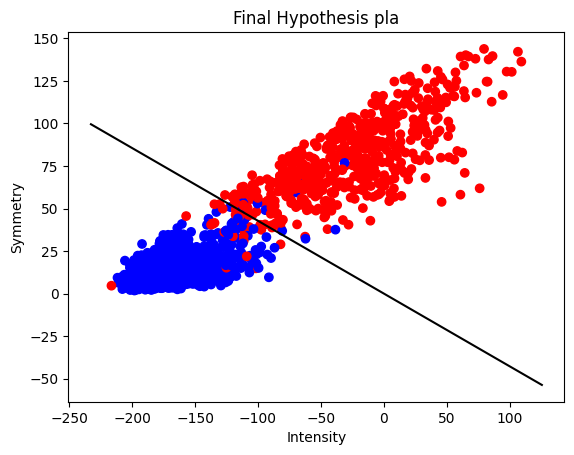

In [72]:
count=0
w=np.array([0,0,0], dtype=float)
plt.scatter(Digits_train['intensity'],Digits_train['symmetry'],c=clr,label=['1','-1'])
plt.xlabel('Intensity')
plt.ylabel('Symmetry')
while count<=1000:
  for i in range(0,len(x)):
    if (y[i]!= np.sign(np.dot(w,np.transpose(x[i])))):
      w+=x[i]*float(y[i])
      count+=1
      if(misclass(w,x,y)==0):
        break
print('The final weights are ', w)
plotq(w,"black","pla")
error_digits_pla_test=misclass(w,x_test,y_test)
print(f"Total number of misclassified: {error_digits_pla_test}")

In [89]:
def pocket(x,y,max_iter):
    j = 0
    error = []
    w=np.zeros(x[0].shape)
    best_w = np.copy(w)
    best_error = misclass(w, x, y)
    while j <= max_iter:
        j += 1
        pred = calcFunc(best_w, x)
        misclassified_ind = np.where(pred != y)[0]
        error.append(misclass(best_w,x,y))
        if len(misclassified_ind) == 0:
            break
        i = np.random.choice(misclassified_ind)
        w += x[i] * y[i]
        new_error = misclass(w,x,y)
        if new_error < best_error:
            best_w = np.copy(w)
            best_error = new_error
    plotq(best_w,"black","Pocket")
    return error,best_w

Total  misclass:  37
[  -1.    -116.084 -132.438]


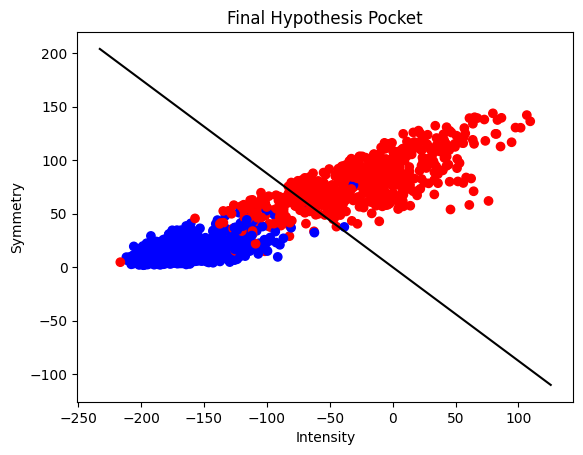

In [90]:
plt.scatter(Digits_train['intensity'],Digits_train['symmetry'],c=clr,label=['1','-1'])
plt.xlabel('Intensity')
plt.ylabel('Symmetry')

error,best_w=pocket(x,y,1000)
print("Total  misclass: ",misclass(best_w,x_test,y_test))
print(best_w)

## Task 3 LP 2

Total misclass:  17


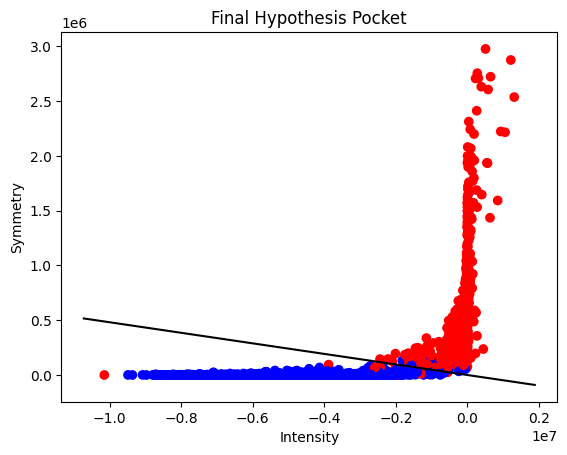

In [91]:
x_cube=x**3
x_test_cube=x_test**3
plt.scatter(x_cube[:,1],x_cube[:,2],c=clr,label=['1','-1'])
plt.xlabel('Intensity')
plt.ylabel('Symmetry')
error,w_pocket_digits=pocket(x_cube,y,1000)
print('Total misclass: ',misclass(w_pocket_digits,x_test_cube,y_test))